In [156]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


In [157]:
t = sp.symbols('t', real=True)
x = sp.Function('x')
gamma, omega_0, F_0, omega_d = sp.symbols('gamma omega_0 F_0 omega_d', real=True, positive=True)
x0, v0 = sp.symbols('x0 v0', real=True)

In [158]:
# Równanie oscylatora
# Oscylator harmoniczny bez tłumienia i wymuszenia
equation_1 = sp.Eq(x(t).diff(t, t) + omega_0**2 * x(t), 0)  
 # Wymuszenie kosinusoidalne
equation_2 = sp.Eq(x(t).diff(t, t) + 2 * gamma * x(t).diff(t) + omega_0**2 * x(t), F_0 * sp.cos(omega_d * t)) 
 # Tłumienie bez wymuszenia
equation_3 = sp.Eq(x(t).diff(t, t) + 2 * gamma * x(t).diff(t) + omega_0**2 * x(t), 0) 
 # Tłumienie z wymuszeniem kosinusoidalnym
equation_4 = sp.Eq(x(t).diff(t, t) + 2 * gamma * x(t).diff(t) + omega_0**2 * x(t), F_0 * sp.cos(omega_d * t)) 


In [159]:
equation_3

Eq(2*gamma*Derivative(x(t), t) + omega_0**2*x(t) + Derivative(x(t), (t, 2)), 0)

In [160]:
#rozwiązania równiań
solution_1 = sp.dsolve(equation_1, x(t), ics={x(0): x0, x(t).diff(t).subs(t,0): v0})
solution_2 = sp.dsolve(equation_2, x(t), ics={x(0): x0, x(t).diff(t).subs(t,0): v0})
solution_3 = sp.dsolve(equation_3, x(t), ics={x(0): x0, x(t).diff(t).subs(t,0): v0})
solution_4 = sp.dsolve(equation_4, x(t), ics={x(0): x0, x(t).diff(t).subs(t,0): v0})


In [171]:
params1 = {omega_0: 1, x0: 1, v0: 0}
params2 = {omega_0: 2, gamma: 0.0, F_0: 1, omega_d: 2.5, x0: 1, v0: 0} #{omega_0: 1, gamma: 0.1, F_0: 1, omega_d: 1, x0: 1, v0: 0}
params3 = {omega_0: 1, gamma: 0.1, x0: 1, v0: 0}
params4 = {omega_0: 1, gamma: 0.1, F_0: 1, omega_d: 1, x0: 1, v0: 0}

/home/ania/.local/share/pypoetry/venv/lib64/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ania/.local/share/pypoetry/venv/lib64/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


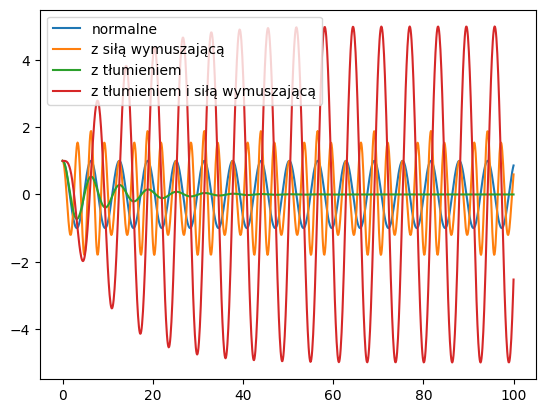

In [172]:
# sp.lambdify(t, sol.rhs.subs({w0: 2, x0: 1, v0: -1}))
# wykresy
t_values = np.linspace(0, 100, 1000)
x_values1 = sp.lambdify(t, solution_1.rhs.subs(params1))(t_values)
x_values2 = sp.lambdify(t, solution_2.rhs.subs(params2))(t_values)
x_values3 = sp.lambdify(t, solution_3.rhs.subs(params3))(t_values)
x_values4 = sp.lambdify(t, solution_4.rhs.subs(params4))(t_values)

plt.plot(t_values, x_values1, label='normalne')
plt.plot(t_values, x_values2, label='z siłą wymuszającą')
plt.plot(t_values, x_values3, label='z tłumieniem')
plt.plot(t_values, x_values4, label='z tłumieniem i siłą wymuszającą')
plt.legend()
plt.show()
